In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math

In [3]:
inputs = keras.Input(shape=(1))
l1 = layers.Dense(8, activation = 'elu')
l2 = layers.Dense(8, activation = 'elu')
l3= layers.Dense(1, activation = 'linear')    
outputs = l1(inputs)
outputs = l2(outputs)
outputs = l3(outputs)
control_NN = keras.Model(inputs=inputs, outputs=outputs, name = 'control_NN')

In [8]:
M = 1000
x = np.random.normal(0,1,size = (M,1))
x.shape

(1000, 1)

In [16]:
control_NN.compile(loss ='mse',optimizer = 'Adam')
control_NN.fit(x = x,y = -x,epochs = 100,verbose = 1)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 298us/sample - loss: 3.0969
Epoch 2/100
1000/1000 [==============================] - 0s 33us/sample - loss: 1.7160
Epoch 3/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.9164
Epoch 4/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.4672
Epoch 5/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.2383
Epoch 6/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.1353
Epoch 7/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0952
Epoch 8/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0798
Epoch 9/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0735
Epoch 10/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0698
Epoch 11/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0670
Epoch 12/100
1000/

1000/1000 [==============================] - 0s 36us/sample - loss: 6.0461e-04
Epoch 94/100
1000/1000 [==============================] - 0s 37us/sample - loss: 5.8014e-04
Epoch 95/100
1000/1000 [==============================] - 0s 35us/sample - loss: 6.0877e-04
Epoch 96/100
1000/1000 [==============================] - 0s 37us/sample - loss: 5.4816e-04
Epoch 97/100
1000/1000 [==============================] - 0s 36us/sample - loss: 5.0496e-04
Epoch 98/100
1000/1000 [==============================] - 0s 37us/sample - loss: 5.0304e-04
Epoch 99/100
1000/1000 [==============================] - 0s 36us/sample - loss: 4.8488e-04
Epoch 100/100
1000/1000 [==============================] - 0s 37us/sample - loss: 4.6538e-04


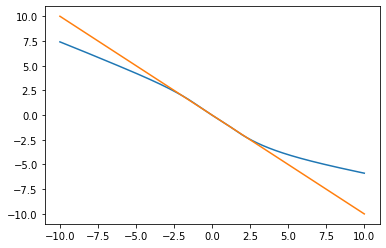

In [17]:
xx = np.linspace(-10,10,1000)
plt.plot(xx,control_NN.predict(xx))
plt.plot(xx,-xx)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

In [35]:
math.exp(1)

2.718281828459045

In [37]:
Z = tf.constant([[1,1],[2,2]],dtype = 'float32')

In [16]:
x = np.random.rand(1)

In [38]:
3*Z

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3., 3.],
       [6., 6.]], dtype=float32)>

In [40]:
math.sqrt(1)*Z

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [2., 2.]], dtype=float32)>

In [9]:
U = Z[:,0]
Y = Z[:,1]

In [17]:
def trainning_data(seed,X0,samplesM,stepsN,dtt,x):
    np.random.seed(seed)
    X = [X0]
    for i in range(stepsN):
        dw = np.random.normal(0,np.sqrt(dtt),size = (samplesM,1))
        dX = np.exp(-x*dtt)*(X[i] + np.sqrt((np.exp(2*x*dtt)-1)/(2*x*dtt))*dw) - X[i]
        X = X + [dX]
    y = np.zeros(shape = (samplesM,1))
    return X, y

In [18]:
len(X)

101

In [25]:
X[3]

array([[ 0.09233453],
       [-0.01690541],
       [-0.00929328]])

In [22]:
seed = 0
samplesM = 3
stepsN = 100
dtt = 0.01
x = 1
X0 = np.zeros(shape = (samplesM,1))

In [23]:
X,y =trainning_data(seed,X0,samplesM,stepsN,dtt,x)

In [29]:
XX = np.zeros(shape = (samplesM,stepsN+1))
XX[:,0] = X0[0]
for i in range(stepsN):
    XX[:,i+1] = XX[:,i] + X[i+1][0]

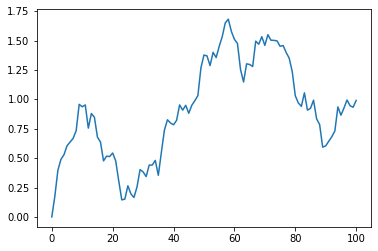

In [30]:
plt.plot(np.arange(101),XX[0,:])